In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
#for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#       time.sleep(60)

    # Create endpoint URL with each city.
#    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
#    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
#    record_count += 1

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


626

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | andreapol
Processing Record 2 of Set 1 | honiara
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | bara
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | san ramon
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | shahrud
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | bonavista
Processing Record 20 of Set 1 | bagdarin
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | miri
Processing Record 23 of Set 1 | hofn
Processing Record 24 of Set 1 | nikolskoye

Processing Record 41 of Set 4 | tongliao
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 44 of Set 4 | izhma
Processing Record 45 of Set 4 | paita
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | contai
Processing Record 49 of Set 4 | grindavik
Processing Record 50 of Set 4 | wilmington
Processing Record 1 of Set 5 | dicabisagan
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 4 of Set 5 | pontes e lacerda
Processing Record 5 of Set 5 | palauig
Processing Record 6 of Set 5 | comodoro rivadavia
Processing Record 7 of Set 5 | mosquera
Processing Record 8 of Set 5 | lorengau
Processing Record 9 of Set 5 | port macquarie
Processing Record 10 of Set 5 | mount gambier
Processing Record 11 of Set 5 | airai
Processing Record 12 of Set 5 | mandera
Processing Record 13 of Set 5 |

Processing Record 31 of Set 8 | san vicente
Processing Record 32 of Set 8 | portree
Processing Record 33 of Set 8 | semnan
Processing Record 34 of Set 8 | hillsborough
Processing Record 35 of Set 8 | pitkyaranta
Processing Record 36 of Set 8 | ust-kut
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | codrington
Processing Record 39 of Set 8 | khatanga
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | potsdam
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | khakurinokhabl
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 46 of Set 8 | nekrasovka
Processing Record 47 of Set 8 | naftah
City not found. Skipping...
Processing Record 48 of Set 8 | buin
Processing Record 49 of Set 8 | fort smith
Processing Record 50 of Set 8 | kismayo
Processing Record 1 of Set 9 | hays
Processing Record 2 of Set 9 | banjar
Processing Record 3 of Se

Processing Record 18 of Set 12 | shwebo
Processing Record 19 of Set 12 | kiama
Processing Record 20 of Set 12 | paonta sahib
Processing Record 21 of Set 12 | derbent
Processing Record 22 of Set 12 | nabire
Processing Record 23 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 24 of Set 12 | buariki
City not found. Skipping...
Processing Record 25 of Set 12 | xiaoweizhai
Processing Record 26 of Set 12 | nantucket
Processing Record 27 of Set 12 | vardo
Processing Record 28 of Set 12 | tongren
Processing Record 29 of Set 12 | sinkat
City not found. Skipping...
Processing Record 30 of Set 12 | martapura
Processing Record 31 of Set 12 | paradwip
City not found. Skipping...
Processing Record 32 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 33 of Set 12 | porto belo
Processing Record 34 of Set 12 | cockburn town
Processing Record 35 of Set 12 | katete
Processing Record 36 of Set 12 | auch
Processing Record 37 of Set 12 | prince rupert
Proc

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Andreapol,56.6513,32.2664,48.78,97,100,10.69,RU,2022-09-19 03:36:19
1,Honiara,-9.4333,159.9500,81.84,79,100,7.96,SB,2022-09-19 03:36:19
2,La Ronge,55.1001,-105.2842,55.65,67,75,6.91,CA,2022-09-19 03:36:20
3,Bethel,41.3712,-73.4140,74.64,76,0,5.75,US,2022-09-19 03:36:20
4,Bara,10.3744,10.7288,72.34,94,100,5.17,NG,2022-09-19 03:36:21
5,Rikitea,-23.1203,-134.9692,72.19,77,28,19.19,PF,2022-09-19 03:36:21
6,Ponta Do Sol,32.6667,-17.1000,73.00,87,48,5.23,PT,2022-09-19 03:36:22
7,Butaritari,3.0707,172.7902,82.04,72,12,17.94,KI,2022-09-19 03:36:22
8,Hermanus,-34.4187,19.2345,49.80,69,96,8.30,ZA,2022-09-19 03:36:22
9,Hilo,19.7297,-155.0900,80.28,92,100,3.44,US,2022-09-19 03:35:22


In [14]:
# Create the output file (CSV).
#output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

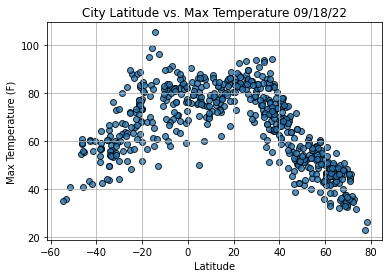

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

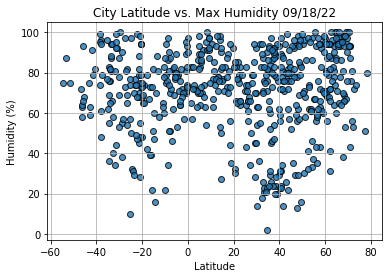

In [17]:
# Build the scatter plot for latitude vs. max humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("World_Weather_Analysis/Fig2.png")

# Show plot.
plt.show()

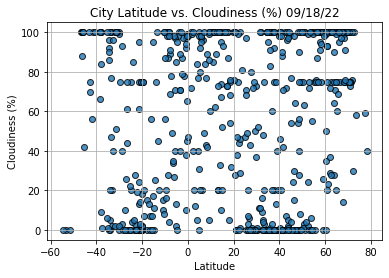

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

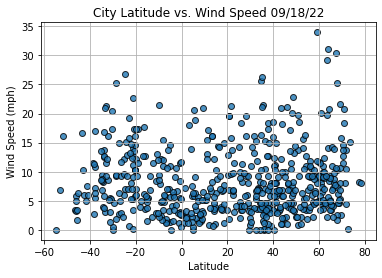

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [23]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

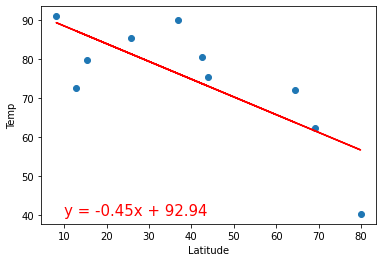

In [24]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [27]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Andreapol,56.6513,32.2664,48.78,97,100,10.69,RU,2022-09-19 03:36:19
2,La Ronge,55.1001,-105.2842,55.65,67,75,6.91,CA,2022-09-19 03:36:20
3,Bethel,41.3712,-73.4140,74.64,76,0,5.75,US,2022-09-19 03:36:20
4,Bara,10.3744,10.7288,72.34,94,100,5.17,NG,2022-09-19 03:36:21
6,Ponta Do Sol,32.6667,-17.1000,73.00,87,48,5.23,PT,2022-09-19 03:36:22
...,...,...,...,...,...,...,...,...,...
567,Davila,18.4726,120.5763,85.98,73,76,14.90,PH,2022-09-19 03:52:48
568,Virginia Beach,36.8529,-75.9780,74.01,91,20,3.44,US,2022-09-19 03:50:47
569,Santa Justina,13.3967,123.4731,84.56,76,100,8.23,PH,2022-09-19 03:52:49
570,Erzin,36.9559,36.2000,72.45,80,3,2.26,TR,2022-09-19 03:52:49


In [28]:
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Andreapol,56.6513,32.2664,48.78,97,100,10.69,RU,2022-09-19 03:36:19
1,Honiara,-9.4333,159.9500,81.84,79,100,7.96,SB,2022-09-19 03:36:19
2,La Ronge,55.1001,-105.2842,55.65,67,75,6.91,CA,2022-09-19 03:36:20
3,Bethel,41.3712,-73.4140,74.64,76,0,5.75,US,2022-09-19 03:36:20
4,Bara,10.3744,10.7288,72.34,94,100,5.17,NG,2022-09-19 03:36:21
...,...,...,...,...,...,...,...,...,...
568,Virginia Beach,36.8529,-75.9780,74.01,91,20,3.44,US,2022-09-19 03:50:47
569,Santa Justina,13.3967,123.4731,84.56,76,100,8.23,PH,2022-09-19 03:52:49
570,Erzin,36.9559,36.2000,72.45,80,3,2.26,TR,2022-09-19 03:52:49
571,Vao,-22.6667,167.4833,73.13,74,0,13.27,NC,2022-09-19 03:52:50
